<h3>To be done:</h3>
<h4>kaggle competition:</h4>
<p>https://www.kaggle.com/c/tabular-playground-series-jun-2021/overview/evaluation</p>

<h4>help link</h4>
<p>https://www.youtube.com/watch?v=vjjWPadW20Q</p>

In [1]:
import h2o
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import std

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import CountVectorizer

<h3>Investigating and cleaning the data</h3>

In [2]:
train = pd.read_csv('./data/train.csv')
prediction_frame = pd.read_csv('./data/test.csv')

In [3]:
#
# check for missing data
#
#train.isnull().sum()

In [4]:
train.describe()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000
mean,99999.500000,0.972710,1.168365,2.219325,2.296735,0.793530,1.431105,1.010695,0.673090,1.94398,...,1.798040,0.508695,1.827300,0.910370,1.603585,1.219210,0.806895,1.282925,2.94021,0.632005
std,57735.171256,3.941836,3.993407,6.476570,7.551858,2.935785,5.162746,3.949231,2.234949,3.93133,...,5.053014,1.867330,7.188924,3.835182,4.877679,4.826003,2.458741,4.261420,10.78465,3.925310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,49999.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,99999.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,149999.250000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.00000,...,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.00000,0.000000
max,199999.000000,61.000000,51.000000,64.000000,70.000000,38.000000,76.000000,43.000000,30.000000,38.00000,...,54.000000,24.000000,79.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.00000,52.000000


In [5]:
features = list(train.columns)
features.remove('target')
features.remove('id')

In [6]:
#
# counting the number of zeros per column
#

#for feature in features:
#    print(feature, train[feature].isin([0]).sum())

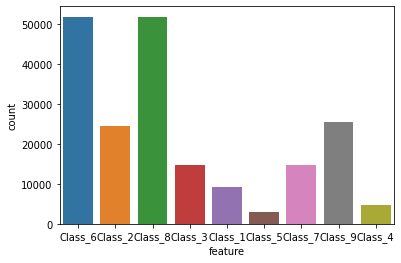

In [7]:
#
# examine the distribution of targets among the dataset
#
sns.countplot(x = "target", data = train)
plt.xlabel('feature')
plt.show()


In [8]:


#
# IDEA: tried to remove skewness by applying log transformation
# RESULT: his didnt work too well - logloss ~1.7
#


#
# to avoid 0 division on log transform, add a constant to features
#
for feature in features:
    train[feature]  = train[feature] + 1


#
# check skewness
#
#for feature in features:
    #print(train[feature].skew())
    
#
# apply log transform to lower skewness
#
for feature in features:
    train[feature] = np.log(train[feature])
    


In [9]:
train['target'].value_counts()

Class_6    51811
Class_8    51763
Class_9    25542
Class_2    24431
Class_3    14798
Class_7    14769
Class_1     9118
Class_4     4704
Class_5     3064
Name: target, dtype: int64

In [37]:
'''
#
# Undersampling approach (didnt work too well)
#

undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
train_undersample, target_undersample = undersample.fit_resample(train, train['target'])
# summarize class distribution
print(pd.Series(target_undersample).value_counts())
'''

Class_8    51763
Class_9    25542
Class_2    24431
Class_3    14798
Class_7    14769
Class_1     9118
Class_4     4704
Class_5     3064
Class_6     3064
Name: target, dtype: int64


In [13]:
'''
#
# Overasmpling approach (didnt work too well)
#

# fit transform method need numeric input, hence I need to convert the target classes to numbers

train['target'] = train['target'].str.replace('Class_', '')
train['target'].astype(int)

#
# fix class imbalance:
#

smote = SMOTE()

# Apply SMOTE to your data, some previously defined X and y
train_resampled, target_resampled = smote.fit_resample(train, train['target'])

# Look at your new, resampled value counts - should be equal!
train_resampled['target'] = 'Class_' + train_resampled['target'].astype(str)
train_resampled['target'] = train_resampled['target'].str.replace('.0', '')
print(pd.Series(target_resampled).value_counts())

'''

"\n#\n# Resampling approach (didnt work too well)\n#\n\n# fit transform method need numeric input, hence I need to convert the target classes to numbers\n\ntrain['target'] = train['target'].str.replace('Class_', '')\ntrain['target'].astype(int)\n\n#\n# fix class imbalance:\n#\n\nsmote = SMOTE()\n\n# Apply SMOTE to your data, some previously defined X and y\ntrain_resampled, target_resampled = smote.fit_resample(train, train['target'])\n\n# Look at your new, resampled value counts - should be equal!\ntrain_resampled['target'] = 'Class_' + train_resampled['target'].astype(str)\ntrain_resampled['target'] = train_resampled['target'].str.replace('.0', '')\nprint(pd.Series(target_resampled).value_counts())\n"

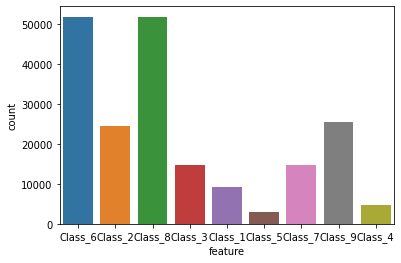

In [11]:
sns.countplot(x = "target", data = train)
plt.xlabel('feature')
plt.show()

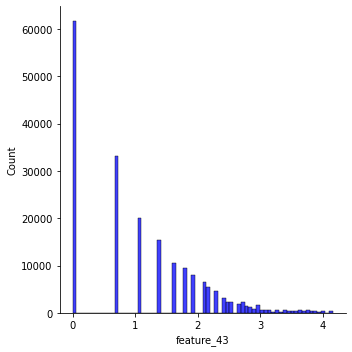

In [12]:
#
# show the distribution of values for the columns
#

sns.displot(train["feature_43"], color="b")

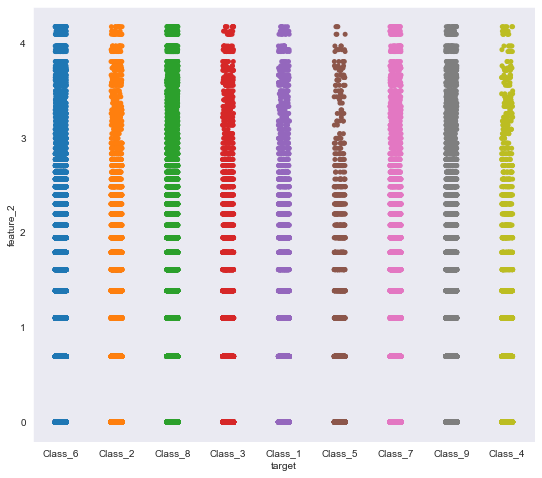

In [13]:
#
# examine distribution of features among the targets
#
sns.set_style('dark')
sns.set_color_codes(palette='deep')
fig, ax = plt.subplots(figsize=(9,8))

sns.stripplot(x = "target", y = "feature_2", data = train, jitter = True, label="train")
    
plt.show()

<AxesSubplot:>

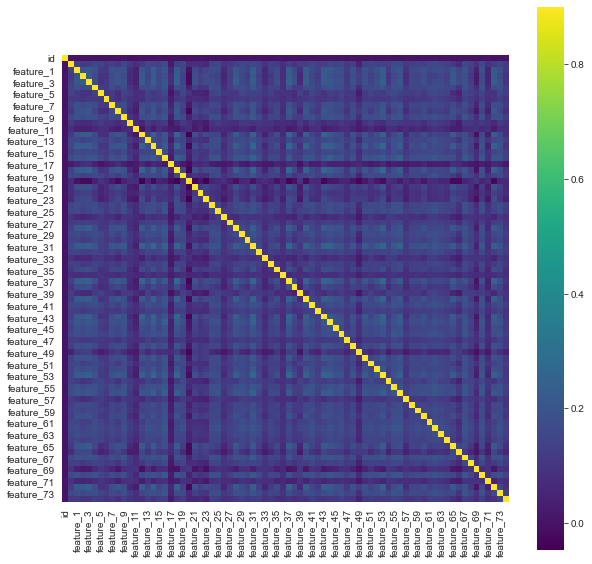

In [15]:
#
# examine correlation between features
#
corr = train.corr()
plt.subplots(figsize=(10, 10))
sns.heatmap(corr, vmax=0.9, cmap="viridis", square=True)

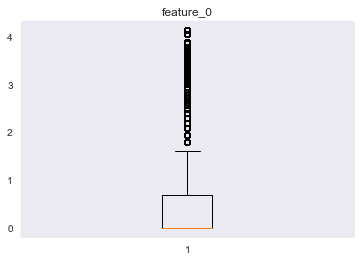

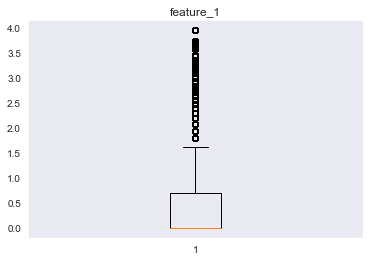

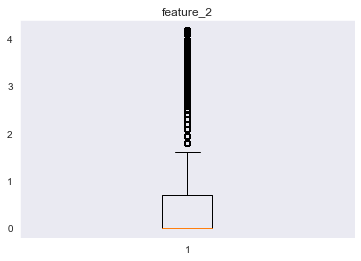

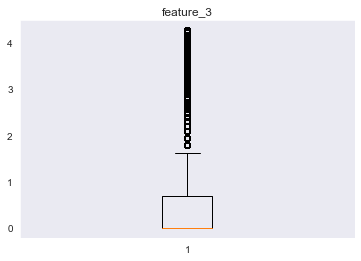

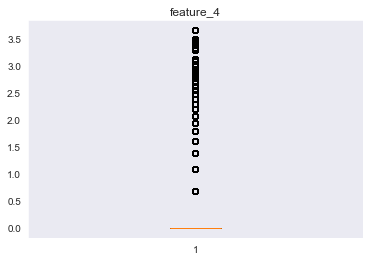

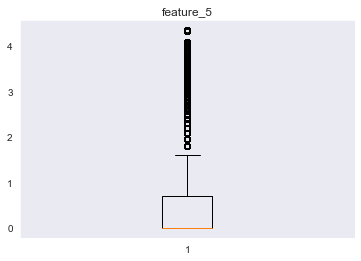

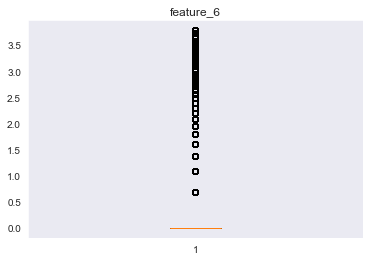

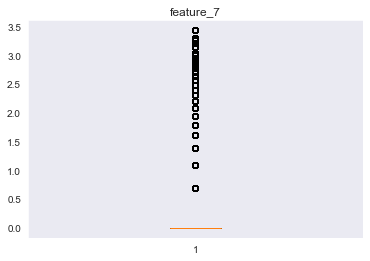

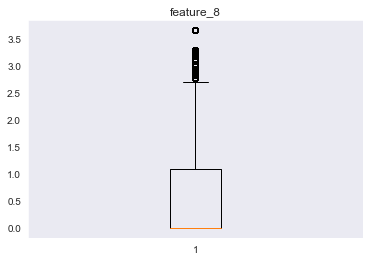

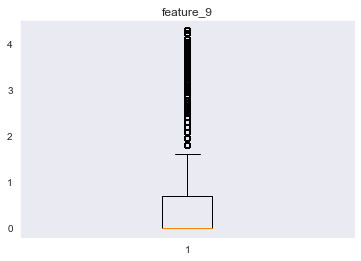

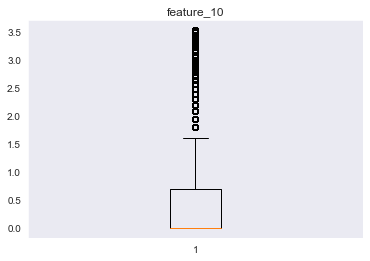

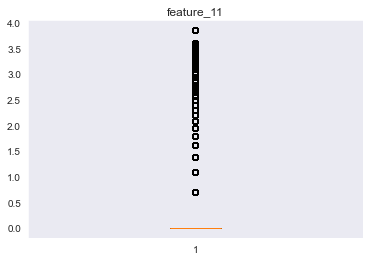

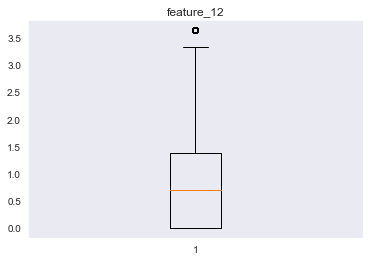

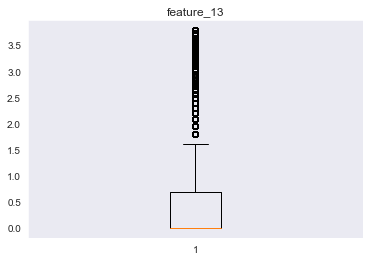

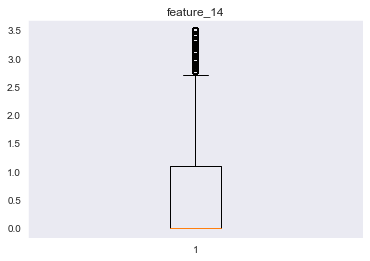

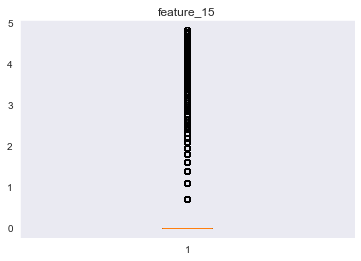

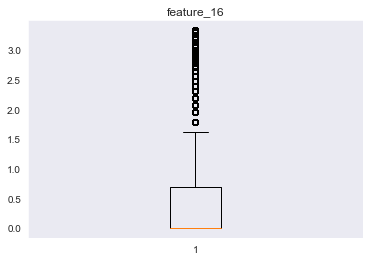

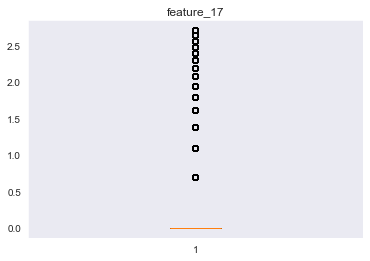

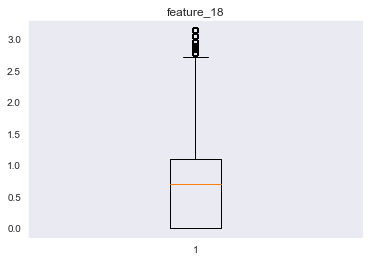

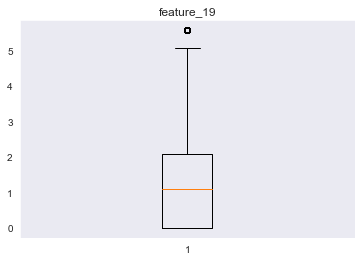

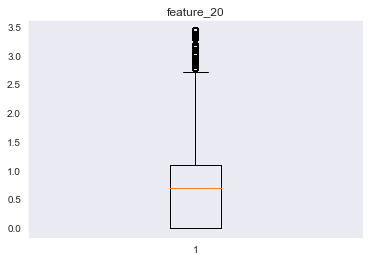

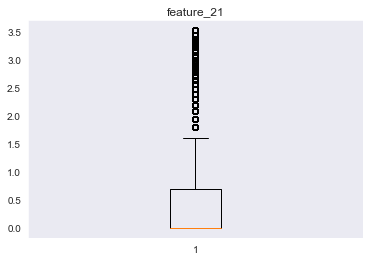

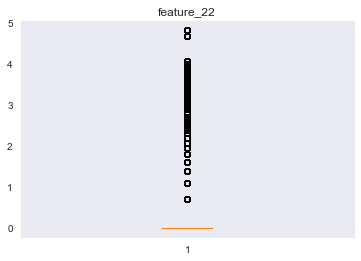

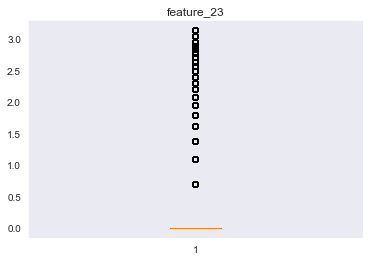

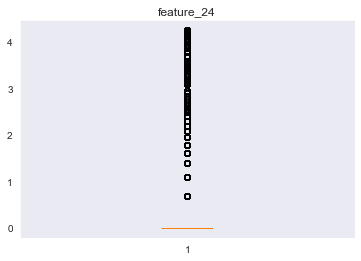

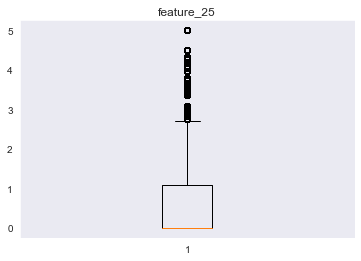

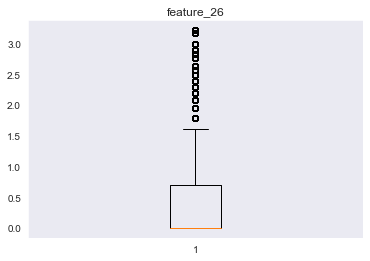

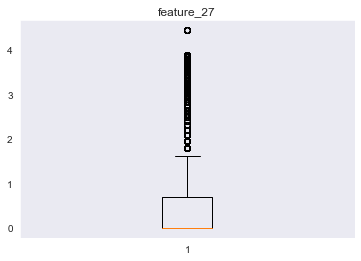

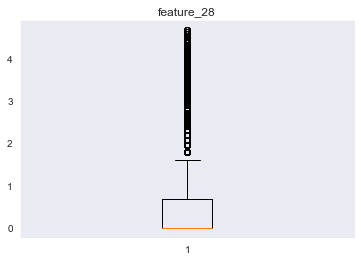

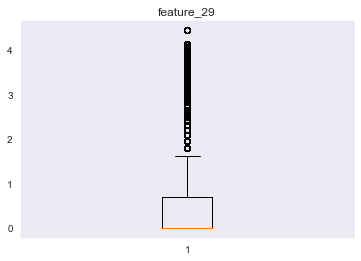

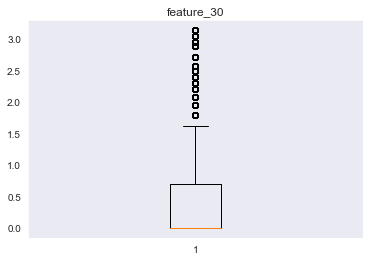

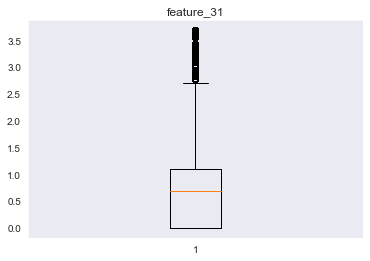

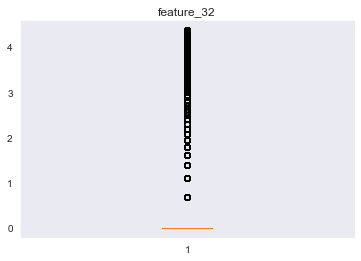

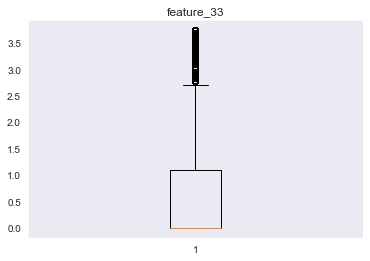

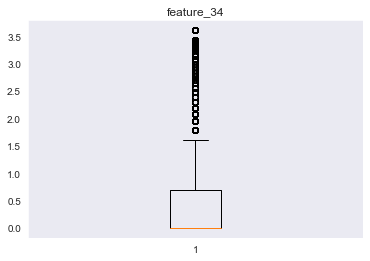

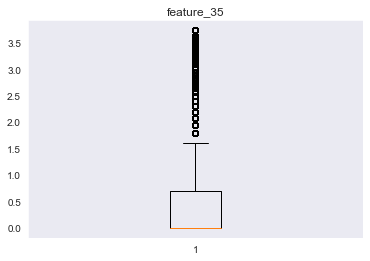

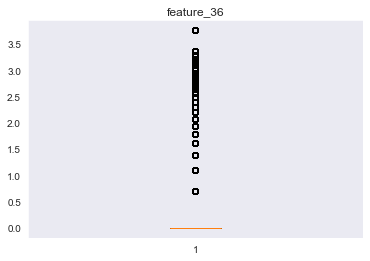

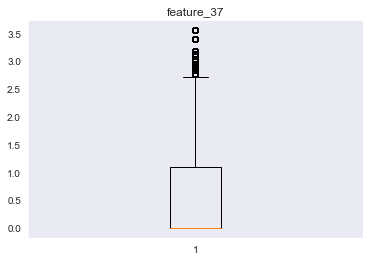

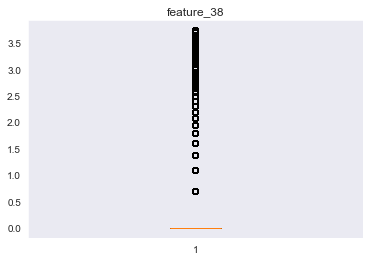

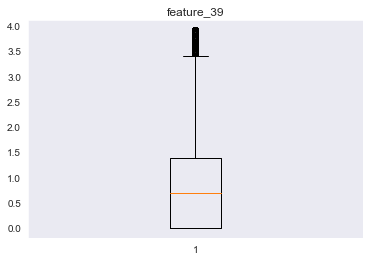

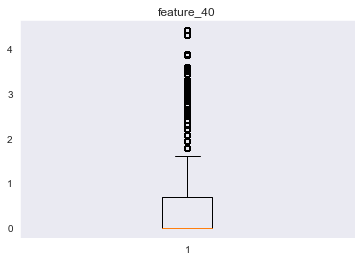

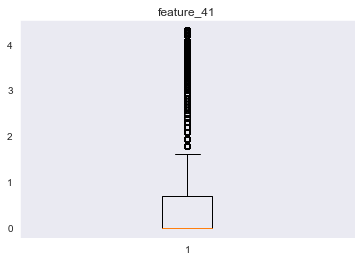

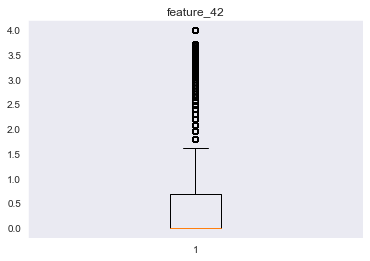

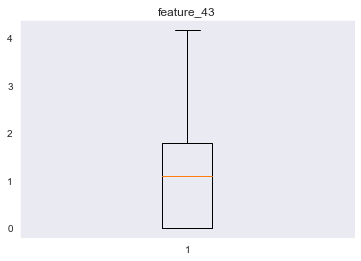

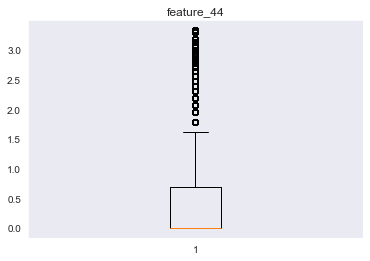

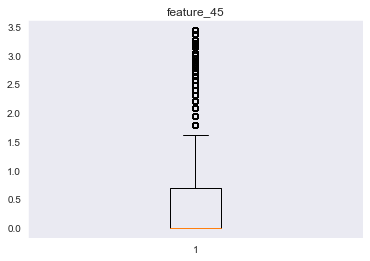

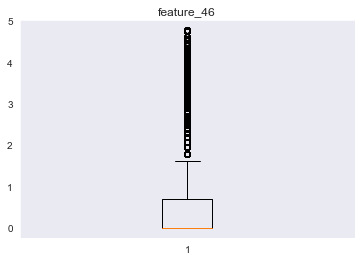

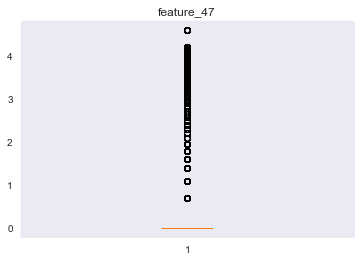

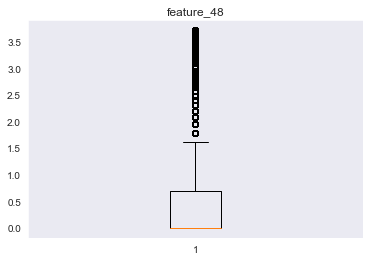

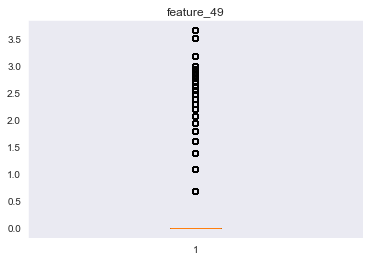

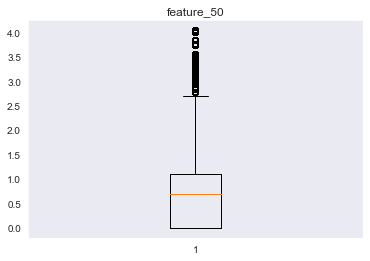

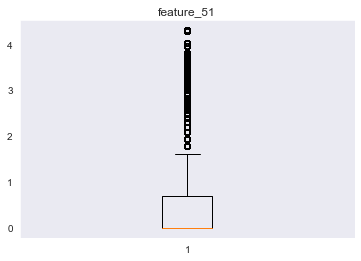

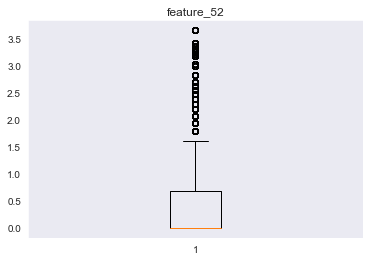

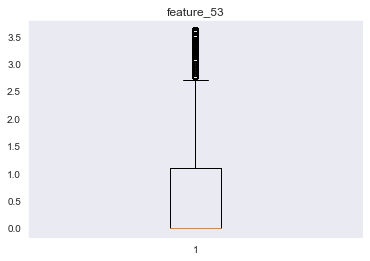

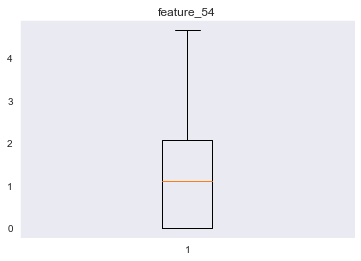

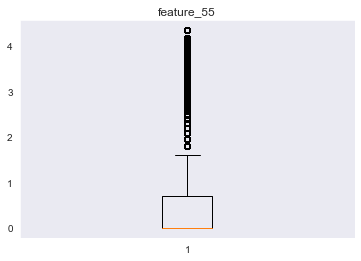

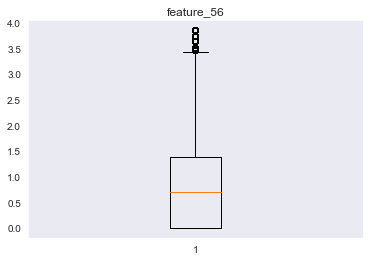

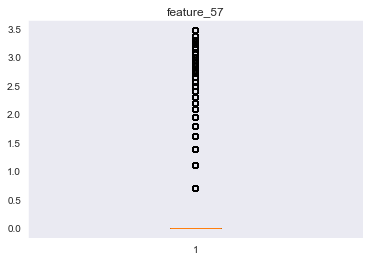

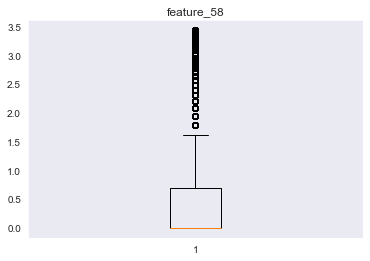

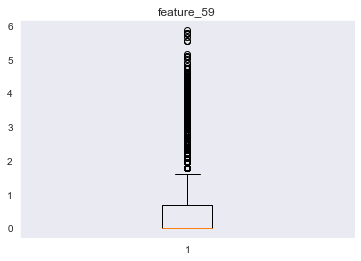

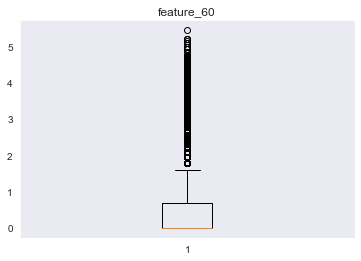

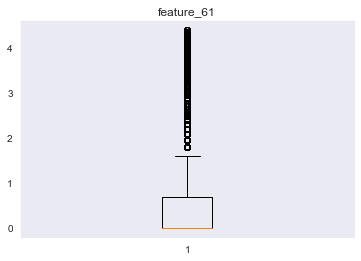

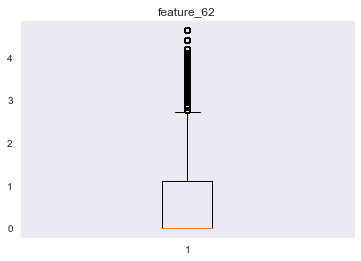

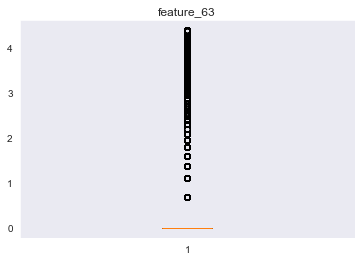

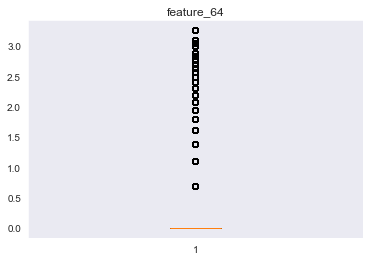

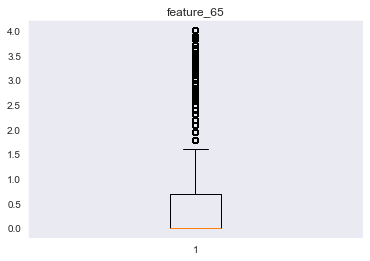

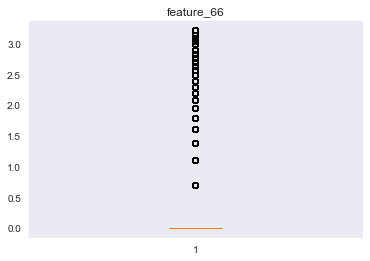

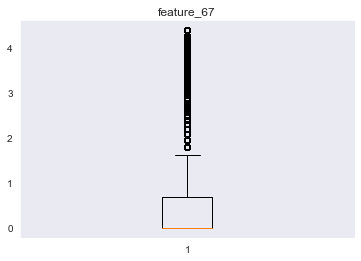

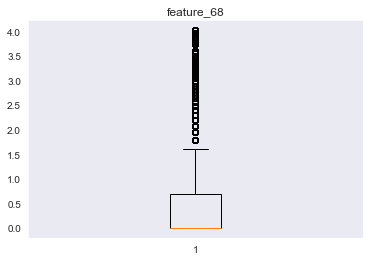

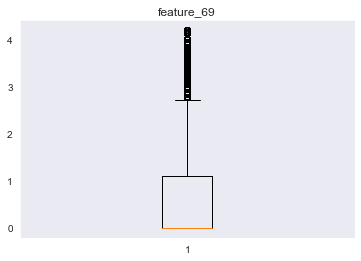

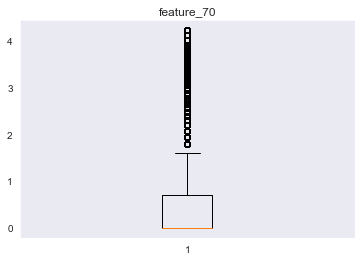

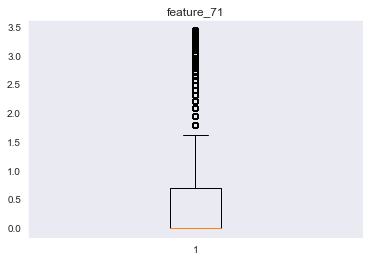

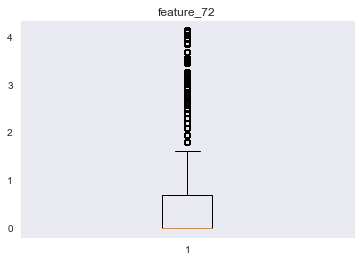

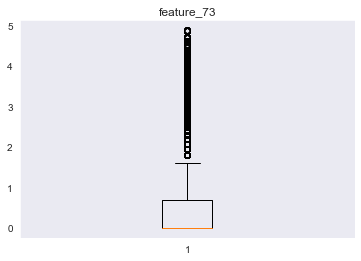

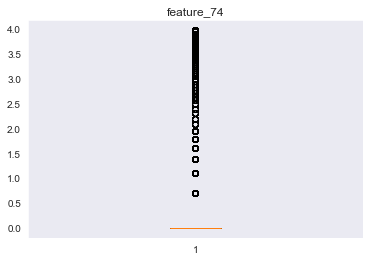

In [38]:
#
# examine outliers in features
#

for col in train.columns[:-1]:
    if col != "id":
        plt.boxplot(train[col])
        plt.title(col)
        plt.show()


In [41]:
#
# remove outliers
#

for f in features:
    q75 = np.percentile(train.loc[:,f],75)
    intr_qr = q75
 
    max = q75+(1.5*intr_qr)

    train.loc[train[f] > max,f] = np.nan

In [33]:
#
# IDEA: try to encode values to only 0 and 1
# RESULT: 
#

#for feature in features:
#    train[feature] = np.where(train[feature]>0, 1, 0)


In [17]:
#
# finished dataprep, write dataframe to .csv
#

train.to_csv('./data/prepped-train.csv')